# Importando bibliotecas

**Name:** indicates the storm name.
**Year:** indicates the year when the storm has occurred.
**Month:** indicates the month when the storm has occurred.
**Day:** indicates the day when the storm has occurred.
**Hour:** indicates the day when the storm has occurred.
**Lat:** Latitude
**Long:** Longitude
**Status:** The status of storm:
> Temos 3 tipos em nosso **Dataset**:
    1. **Tropical Storm** (Minimum);
    2. **Tropical Depression** (Medium);
    3. **Hurricane** (High);

**Category:** The category of storm if it's -1, 0, 1 ...
**Wind:** The wind in knots
**Pressure:** The atmospheric pressure
**Tropicalstorm_force_diamete:** Total diameter of the force of Tropical Storm
**hurricane_force_diameter:** Total diameter of the force of Hurricane

# Questões a serem respondidas?

1. Ver quais as tempestades com maior ocorrência? (nome, category, status)
2. Qual a maior velocidade do vento e pressão?
3. Qual a maior ocorrência das tempestades em um período de tempo (dia, mes, ano ) -> Desafio semanas
4. Qual a localidade que sofreu mais tempestades. (independente das variaveis?). Exemplo: A cidade que teve maior frequência de tempestades
5. Em quais localidades as tempestades (por status) ocorreram. Exemplo: Hurricane houve a maior concentração no Alabama, porém a depressão em Michigan e New York
6. Quais as localidade mais afetadas, por um determinado Tempestade. Exemplo: A Carrie ocorreu com maior frequência em New York e Florida.
7. Ano que teve mais tempestades.


## Determinar categorias por tipo de tempestade

> Como podemos determinar as categorias pelos tipos de tempestades.


 ## Importando todas as biblioteca necessárias


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


### Carregando os Datasets

> Iremos juntar todos os dados em apenas um único DataFrame
    > O arquivo storms.csv contém tempestades da época de 1950 aos dias atuais
    > Já storms_updated.csv contém dados de 1852 a 1950
Quando já finalizamos a junção dos dados, iremos realizar um sort dos valores por ano, mês e dia

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Jeferson-Peter/DataScience-Storm-Analytics/master/storms.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Jeferson-Peter/DataScience-Storm-Analytics/master/storms_updated.csv')
df = pd.concat([df1, df2])\
        .sort_values(by=['year', 'month', 'day'], ascending=[True, True, True])\
        .reset_index(drop=True)
df

,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,AL011852,1852,8,26,6,30.2,-88.6,hurricane,3,100,961,NaN,NaN
1,AL031853,1853,9,3,12,19.7,-56.2,hurricane,4,130,924,NaN,NaN
2,AL031854,1854,9,7,12,28.0,-78.6,hurricane,3,110,938,NaN,NaN
3,AL031854,1854,9,8,18,31.6,-81.1,hurricane,3,100,950,NaN,NaN
4,AL031854,1854,9,8,20,31.7,-81.1,hurricane,3,100,950,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30011,Wanda,2021,11,6,18,37.1,-38.0,tropical storm,0,35,1002,100.0,0.0
30012,Wanda,2021,11,7,0,37.4,-37.4,tropical storm,0,35,1003,60.0,0.0
30013,Wanda,2021,11,7,6,38.1,-36.4,tropical storm,0,35,1004,60.0,0.0
30014,Wanda,2021,11,7,0,37.4,-37.4,tropical storm,0,35,1003,60.0,0.0


In [3]:
df = df.drop(columns=['hour'])

# Tratamento de dados
>O tratamento de dados é algo muito importante, no qual analisamos o nosso dataset por completo, para verificar, se precisaremos realizar tratamentos, como tipo das colunas, valores nulos.


Analisaremos a integridade dos dados, ou seja, inicialmente verificaremos a quantidade de dados nulos.

In [4]:
df.isna().sum()

name                                0
year                                0
month                               0
day                                 0
lat                                 0
long                                0
status                              0
category                            0
wind                                0
pressure                            0
tropicalstorm_force_diameter    17551
hurricane_force_diameter        17551
dtype: int64

Como podemos perceber no código acima `df.isna().sum()`, nos relata a quantidade de dados nulos em cada coluna. Para uma melhor visualização dos dados nulos iremos separalos em outro dataframe

In [5]:
# Filtrando apenas as colunas com valores maiores que 0.
# TODO: Criar texto explicando o por que da analise sobre estas colunas e se há necessidade de tratar.
index_1 = list(df.loc[pd.isna(df.tropicalstorm_force_diameter), :].index)
index_2 = list(df.loc[pd.isna(df.hurricane_force_diameter), :].index)
all_nan_ind = list(set(index_1 + index_2))
len(all_nan_ind)
# half_empty_columns_df
half_empty_columns_df = df.filter(items = all_nan_ind, axis=0)
half_empty_columns_df

,name,year,month,day,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,AL011852,1852,8,26,30.2,-88.6,hurricane,3,100,961,NaN,NaN
1,AL031853,1853,9,3,19.7,-56.2,hurricane,4,130,924,NaN,NaN
2,AL031854,1854,9,7,28.0,-78.6,hurricane,3,110,938,NaN,NaN
3,AL031854,1854,9,8,31.6,-81.1,hurricane,3,100,950,NaN,NaN
4,AL031854,1854,9,8,31.7,-81.1,hurricane,3,100,950,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
22452,Harvey,2011,8,20,17.0,-88.3,tropical storm,0,55,995,NaN,NaN
22466,Irene,2011,8,21,17.8,-64.6,tropical storm,0,60,993,NaN,NaN
22476,Irene,2011,8,22,18.1,-65.8,tropical storm,0,60,990,NaN,NaN
22487,Irene,2011,8,24,22.4,-74.0,hurricane,3,100,955,NaN,NaN


### Quais os tipos de dados das colunas?

In [6]:
df.dtypes

name                             object
year                              int64
month                             int64
day                               int64
lat                             float64
long                            float64
status                           object
category                          int64
wind                              int64
pressure                          int64
tropicalstorm_force_diameter    float64
hurricane_force_diameter        float64
dtype: object

Todos os tipos dados estão corretos para a nossa analise, logo não precisaremos realizar nenhuma conversão. Vamos adicionar uma nova coluna chamada **date** para facilitar a nossa busca por datas.

In [7]:
def format_date_field(row):
        date=datetime(row['year'], row['month'], row['day'])
        row['date'] = pd.to_datetime(date)
        return row

df = df.apply(lambda row: format_date_field(row), axis=1)
df['date']

0       1852-08-26
1       1853-09-03
2       1854-09-07
3       1854-09-08
4       1854-09-08
           ...    
30011   2021-11-06
30012   2021-11-07
30013   2021-11-07
30014   2021-11-07
30015   2021-11-07
Name: date, Length: 30016, dtype: datetime64[ns]

Como podemos ver a coluna **date** é do tipo **datetime**, o que queriamos.
Podemos agora excluir as colunas **year**, **month**, **day**

In [8]:
df[['date', 'year', 'month', 'day']].sample(2)

df = df.drop(columns=['year', 'month', 'day'])
df.head()

,name,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter,date
0,AL011852,30.2,-88.6,hurricane,3,100,961,NaN,NaN,1852-08-26
1,AL031853,19.7,-56.2,hurricane,4,130,924,NaN,NaN,1853-09-03
2,AL031854,28.0,-78.6,hurricane,3,110,938,NaN,NaN,1854-09-07
3,AL031854,31.6,-81.1,hurricane,3,100,950,NaN,NaN,1854-09-08
4,AL031854,31.7,-81.1,hurricane,3,100,950,NaN,NaN,1854-09-08


Iremos converter a coluna **wind** para km/h, pois está como **knots**

In [9]:
df['wind_kmh'] = df['wind'].apply(lambda x: x*1.852)
df.rename(columns={'wind':'wind_kn'}, inplace=True)
df[['wind_kn','wind_kmh']].head()

,wind_kn,wind_kmh
0,100,185.20
1,130,240.76
2,110,203.72
3,100,185.20
4,100,185.20


# Analise Exploratória

> Inicialmente iremos verificar a maior ocorrência de tempestades.
> **OBS:** É importante ressaltar que não pegaremos todas as tempestades

In [10]:
print(f"O total de tempestades registradas foram {len(df['name'].unique().tolist())}")

O total de tempestades registradas foram 651


Como podemos ver, o total de tempestades registradas é de 651, mas nem todas elas possuem um nome de fato, umas só possuem um código. Vamos demonstrar:

In [11]:
# Filtrando as tempestades (cujo nem todos os caracteres estão no alfabeto)
df_not_real_names = df[~df['name'].str.isalpha()]

# Filtrando as tempestades (cujo todos os caracteres estão no alfabeto)
df_real_names = df[df['name'].str.isalpha()]

# Visualizando estas separações
display(df_real_names['name'][:5],
        df_not_real_names['name'][:5])

602    Able
603    Able
604    Able
605    Able
606    Able
Name: name, dtype: object

0    AL011852
1    AL031853
2    AL031854
3    AL031854
4    AL031854
Name: name, dtype: object

In [12]:
df_real_names.sample(20)

,name,lat,long,status,category,wind_kn,pressure,tropicalstorm_force_diameter,hurricane_force_diameter,date,wind_kmh
3511,Amelia,28.6,-98.7,tropical depression,-1,30,1010,NaN,NaN,1978-07-31,55.56
4055,Gloria,15.5,-21.0,tropical depression,-1,25,1005,NaN,NaN,1979-09-04,46.30
8706,Hortense,20.0,-42.5,tropical storm,0,50,997,NaN,NaN,1990-08-27,92.60
25697,Matthew,13.4,-59.8,tropical storm,0,50,1009,270.0,0.0,2016-09-28,92.60
11149,Humberto,22.9,-48.0,hurricane,1,75,982,NaN,NaN,1995-08-27,138.90
11915,Tanya,37.1,-43.2,hurricane,1,75,973,NaN,NaN,1995-10-31,138.90
6629,Kate,25.2,-85.3,hurricane,3,105,956,NaN,NaN,1985-11-20,194.46
21535,Bonnie,21.7,-74.4,tropical depression,-1,30,1008,0.0,0.0,2010-07-22,55.56
8647,Fran,7.9,-44.6,tropical depression,-1,25,1010,NaN,NaN,1990-08-12,46.30
28281,Isaias,30.1,-80.0,tropical storm,0,60,995,170.0,0.0,2020-08-03,111.12


### 1. Visualizando as tempestades com maior ocorrência
> Para visualizar as tempestades com maior ocorrência, iremos realizar outro filtro, baseado na contagem dos valores. E também voltado apenas nas tempestades com nomes reais

C:\Users\jefer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


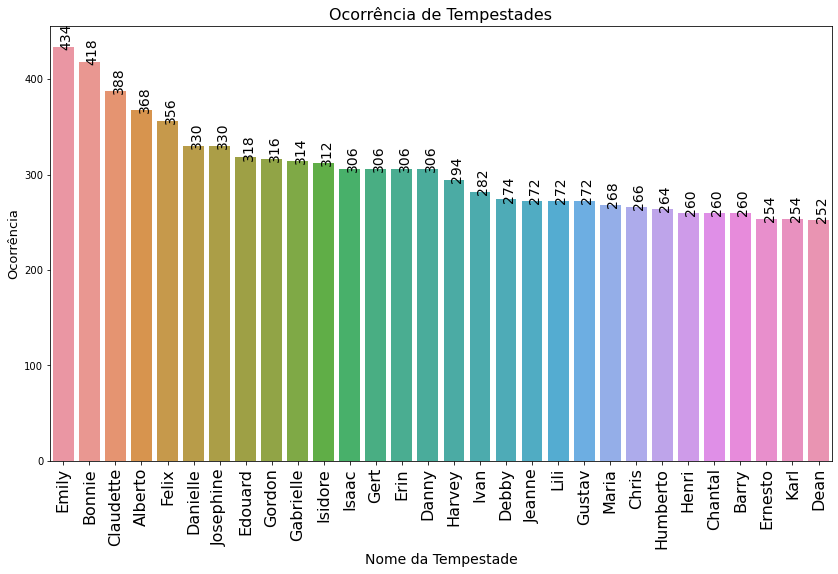

In [13]:
# Filtering date based on "name" and count of each values
most_frequent_storms = df_real_names[df_real_names['name'].isin(
        df_real_names['name'].value_counts()[df_real_names['name'].value_counts()>250].index)]

# Order by clause, to sort the graphic plot
order_by_clause = most_frequent_storms['name'].value_counts().index

fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(most_frequent_storms['name'], order=order_by_clause, ax=ax)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()),
                    (p.get_x()+0.25, p.get_height()+0.1),
                    rotation=90,
                    fontsize=14)
plt.title("Ocorrência de Tempestades", fontsize=16)
plt.xlabel("Nome da Tempestade", fontsize=14)
plt.ylabel("Ocorrência", fontsize=13)
plt.xticks(rotation=90, fontsize=16)
plt.show()

**Com a plotagem do gráfico acima, podemos visualizar que as tempestades com maior ocorrência, foram:**

1. Emily (434 ocorrências);
2. Bonnie (418 ocorrências);
3. Claudette (388 ocorrências);
4. Alberto (368 ocorrências);
5. Felix (356 ocorrências).

> Visualizando todos os tipos de status:


In [14]:
df.status.unique()

array(['hurricane', 'tropical storm', 'tropical depression'], dtype=object)

## 2. Visualizando relação entre Status e Categoria

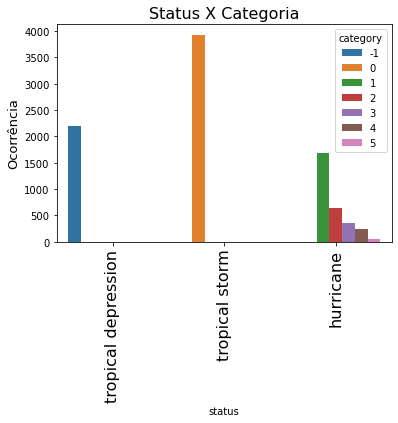

In [15]:
sns.countplot(x='status', hue='category', data=most_frequent_storms)
plt.title("Status X Categoria", fontsize=16)
# plt.xlabel("Nome da Tempestade", fontsize=14)
plt.ylabel("Ocorrência", fontsize=13)
plt.xticks(rotation=90, fontsize=16)
plt.show()

    ## 3. Visualizando relação entre Wind Kn e Categoria

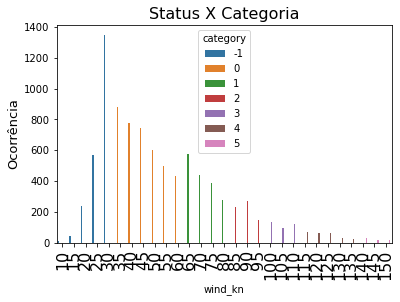

In [16]:
sns.countplot(x='wind_kn', hue='category', data=most_frequent_storms)
plt.title("Status X Categoria", fontsize=16)
# plt.xlabel("Nome da Tempestade", fontsize=14)
plt.ylabel("Ocorrência", fontsize=13)
plt.xticks(rotation=90, fontsize=14)
plt.show()

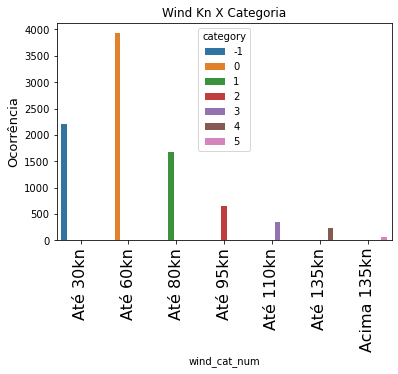

In [35]:
def create_wind_cat(row):
    if row['wind_kn'] <= 30:
        row['wind_cat_num'] = 'Até 30kn'
    elif row['wind_kn'] >= 30 and row['wind_kn'] <=60:
        row['wind_cat_num'] = 'Até 60kn'
    elif row['wind_kn'] >= 60 and row['wind_kn'] <=80:
        row['wind_cat_num'] = 'Até 80kn'
    elif row['wind_kn'] >= 80 and row['wind_kn'] <=95:
        row['wind_cat_num'] = 'Até 95kn'
    elif row['wind_kn'] >= 95 and row['wind_kn'] <=110:
        row['wind_cat_num'] = 'Até 110kn'
    elif row['wind_kn'] >= 110 and row['wind_kn'] <=135:
        row['wind_cat_num'] = 'Até 135kn'
    elif row['wind_kn'] >= 135:
        row['wind_cat_num'] = 'Acima 135kn'
    return row

most_frequent_storms = most_frequent_storms.apply(lambda x: create_wind_cat(x), axis=1)
sns.countplot(x='wind_cat_num', hue='category', data=most_frequent_storms)
plt.title("Wind Kn X Categoria")
plt.ylabel('Ocorrência', fontsize=13)
plt.xticks(rotation=90, fontsize=16)
plt.show()

<AxesSubplot:xlabel='category', ylabel='wind_kn'>

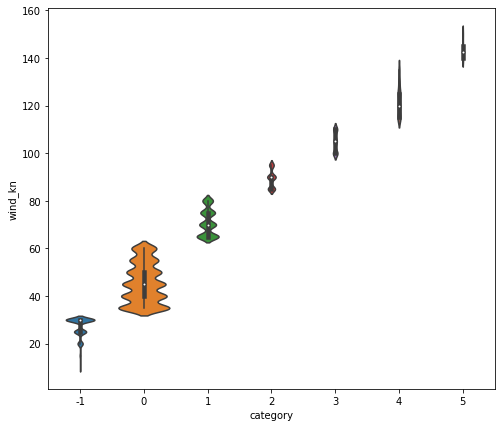

In [18]:
fig, ax = plt.subplots(figsize=(8,7))
sns.violinplot(x="category", y="wind_kn",
               data=most_frequent_storms,
               scale="count", ax=ax)

##### Verificaremos o máximo valor em algumas colunas por curiosidade

In [19]:
df[df['wind_kmh'] == df['wind_kmh'].max()]
#df.loc[df['wind_kmh'].idxmax()]
# sns.countplot(x='wind_kmh', data=df)

,name,lat,long,status,category,wind_kn,pressure,tropicalstorm_force_diameter,hurricane_force_diameter,date,wind_kmh
4334,Allen,21.8,-86.4,hurricane,5,165,899,NaN,NaN,1980-08-07,305.58


In [20]:
df[df['pressure'] == df['pressure'].max()]
# sns.countplot(x='pressure', data=df)

,name,lat,long,status,category,wind_kn,pressure,tropicalstorm_force_diameter,hurricane_force_diameter,date,wind_kmh
16754,AL072003,32.3,-82.0,tropical depression,-1,20,1022,NaN,NaN,2003-07-26,37.04
16755,AL072003,32.8,-82.6,tropical depression,-1,15,1022,NaN,NaN,2003-07-26,27.78
16758,AL072003,32.3,-82.0,tropical depression,-1,20,1022,NaN,NaN,2003-07-26,37.04
16759,AL072003,32.8,-82.6,tropical depression,-1,15,1022,NaN,NaN,2003-07-26,27.78
16760,AL072003,33.0,-83.0,tropical depression,-1,15,1022,NaN,NaN,2003-07-27,27.78
16761,AL072003,33.0,-83.0,tropical depression,-1,15,1022,NaN,NaN,2003-07-27,27.78


## 4. Plotagem de gráficos

In [21]:
dfWeekYear = df.groupby(df['date'].apply(lambda x: "%d/%d" % (x.week, x.year))).size() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) 

# sns.countplot(x='count', data=dfWeekYear)

In [22]:
df.groupby(df['date'].apply(lambda x: "%d/%d" % (x.month, x.year))).size() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(5)

,date,count
514,9/2004,507
380,8/1995,498
530,9/2020,456
508,9/1998,406
520,9/2010,392


In [23]:
df.groupby(df['date'].apply(lambda x: "%d/%d/%d" % (x.day, x.month, x.year))).size() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(5)    

,date,count
824,14/9/2020,40
2559,25/9/1998,34
3292,3/9/2008,34
2789,27/8/1995,34
2284,23/9/2004,32


In [24]:
df.groupby(df['date'].apply(lambda x: "%d" % (x.year))).size() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(5)    

#  df.groupby(df["date"].dt.year).size() \
#  .reset_index(name='count') \
#  .sort_values(['count'], ascending=False) \
#  .head(5)

,date,count
127,1995,1304
152,2020,1215
137,2005,1175
144,2012,932
136,2004,896


# Plotando informações em um Mapa

> Começarmos a plotar essas informações em um mapa, para termos uma forma mais interativa de consulta, mas incialmente faremos a instalção da biblioteca Folium.



In [25]:
!pip install folium
!pip install folium pandas

In [26]:
# Inicialmente criaremos uma função simples para retornar o mapa de heatmap, já para visualização.
import folium
from folium import plugins
def plot_folium_heatmap_map(df:pd.DataFrame,
                            zoom_start:int = 3,
                            radius:int = 25):
    """
    Create a Heatmap visualization for the Dataframe already filtered
    :param df: DataFrame filtered with the data to plot
    :param radius: (int)
    :param zoom_start: (int) innitial zoom value to the map visualization
    :return: The heatmap visualization
    """
    lat = df['lat'].mean()
    long = df['long'].mean()
    localization = df[['lat', 'long']].values

    map = folium.Map([lat, long],tiles='StamenToner', zoom_start=zoom_start)
    folium.plugins.HeatMap(localization, radius=radius).add_to(folium.FeatureGroup(name='Heat Map').add_to(map))
    folium.LayerControl().add_to(map)
    # map.add_child(plugins.HeatMap(localization, radius=radius))
    return map

Plotando o gráfico, visualizando nas tempestades com mais ocorrência (acima de 250)

In [27]:
map_real_names = plot_folium_heatmap_map(df_real_names,zoom_start = 4)
map_real_names

### Vamos plotar o ano em que tivemos mais tempestades

> Para isso vamos verificar qual a maior frequência absoluta do ano.


In [28]:
# Podemos visualizar o ano mais frequente de uma maneira bem simples.
print(f"O ano mais frequente encontrado no dataset foi: {most_frequent_storms.date.dt.year.mode()[0]}")

O ano mais frequente encontrado no dataset foi: 2004


In [29]:
most_frequent_year = most_frequent_storms.loc[most_frequent_storms.date.dt.year == 2004]
plot_folium_heatmap_map(most_frequent_year, radius=15)

In [30]:
# # display(most_frequent_storms)
# most_frequent_stor_by_name = most_frequent_storms.loc[most_frequent_storms.name == 'Emily']
# plot_folium_heatmap_map(most_frequent_stor_by_name, radius=15)

In [33]:
storms_grouped_status = most_frequent_storms.groupby('status')
lat = most_frequent_storms.lat.mean()
long = most_frequent_storms.long.mean()
map_status = folium.Map(location=[lat,long], zoom_start=5,
                  tiles='Stamen Terrain')
status_grouped_keys = storms_grouped_status.groups.keys()
for status_key in status_grouped_keys:
    status_df = storms_grouped_status.get_group(status_key)
    feature_group = folium.FeatureGroup(status_key)
    # for row in status_df.itertuples():
        # folium.Marker(location=[row.lat, row.long]).add_to(feature_group)
    feature_group.add_to(map_status)
# for grp_name, df_grp in storms_grouped_status.groupby('Group'):

folium.LayerControl().add_to(map_status)
map_status

In [32]:
storms_grouped_status = most_frequent_storms.groupby('status')
lat = most_frequent_storms.lat.mean()
long = most_frequent_storms.long.mean()
heatmap_status = folium.Map([lat, long],tiles='Stamen Terrain', zoom_start=5)
status_grouped_keys = storms_grouped_status.groups.keys()
for status_key in status_grouped_keys:
    status_df = storms_grouped_status.get_group(status_key)
    localization = status_df[['lat', 'long']].values
    folium.plugins.HeatMap(localization, radius=15).add_to(folium.FeatureGroup(name=status_key).add_to(heatmap_status))
folium.LayerControl().add_to(heatmap_status)
heatmap_status